In [3]:
import os
import pandas as pd
import numpy as np
from csaps import csaps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def pre(ind):
  folder_path = os.path.join(f'{ind}/activity_glucose')
  files = os.listdir(folder_path)
  df_list = []
  A = []
  T = np.arange(0, 65, 5)
  glucose = []

  for bout in files:
    df = pd.read_csv(f'{ind}/activity_glucose/{bout}')
    df = df.tail(13) # We only select the one hour period after activity has ended
    df.reset_index(drop=True, inplace=True)
    random_perturbation = np.random.normal(0, 0.01)
    df['duration'] = df['duration'] + random_perturbation
    if df['duration'].iloc[0] > 180:
      continue
    # df['time'] = df.index * 5
    A.append(df['duration'].iloc[0])
    df['d_glucose'] = df['glucose'] - df['glucose'].iloc[0]
    df_list.append(df)
    glucose.append(list(df['d_glucose']))

  sorted_dflist = sorted(df_list, key=lambda x: x['duration'].iloc[0])
  df_list = sorted_dflist

  A = sorted(A)
  glucose = np.array(glucose)
  T = np.array(T)
  A = np.array(A)

  return glucose, A, T

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

def bivariate_GAM(ind, lam):
  glucose, A, T = pre(ind)

  xdata = [A, T]
  ydata = np.array(glucose)
  i, j = np.meshgrid(A, T)
  i, j = i.T, j.T
  # print(ydata)
  X_domain = np.linspace(A.min(), A.max(), 501)
  Y_domain = np.linspace(T.min(), T.max(), 500)
  domain = [X_domain, Y_domain]
  model = csaps(xdata, ydata, smooth = lam)

  y_data_s = model(domain)
  X, Y = np.meshgrid(X_domain, Y_domain)
  X, Y = X.T, Y.T

  fig = plt.figure(figsize=(15, 15))
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel('Duration (min)')
  ax.set_ylabel('Time since acticity ended (min)')
  ax.set_zlabel(r"$g_p(a,t)$")
  ax.scatter(i, j, ydata)
  ax.set_title(f'Individual {ind}')
  # ax.view_init(elev=30, azim = 120)
  ax.plot_surface(X, Y, y_data_s, cmap='viridis')

  # fig = go.Figure(data=[go.Surface(z=ydata_s, x = X_domain, y = Y_domain)])

  # fig.update_layout(title='Glucose Post-Activity', autosize=False,
  #                 width=500, height=500,
  #                 margin=dict(l=65, r=50, b=65, t=90))

  fig.show()
  plt.show()
  return X, Y, y_data_s

In [2]:
for i in range(1, 17):
  if i < 10:
    ind = f'00{i}'
  else:
    ind = f'0{i}'
  bivariate_GAM(ind, 0.5)

NameError: name 'pre' is not defined

In [8]:
def bivariate_GAM(ind, lam):
    glucose, A, T = pre(ind)

    xdata = [A, T]
    ydata = np.array(glucose)
    i, j = np.meshgrid(A, T)
    i, j = i.T, j.T
    X_domain = np.linspace(A.min(), A.max(), 501)
    Y_domain = np.linspace(T.min(), T.max(), 500)
    domain = [X_domain, Y_domain]
    model = csaps(xdata, ydata, smooth=lam)

    y_data_s = model(domain)
    X, Y = np.meshgrid(X_domain, Y_domain)
    X, Y = X.T, Y.T

    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Duration (min)')
    ax.set_ylabel('Time since activity ended (min)')
    ax.set_zlabel(r'g_p(a, t)')
    ax.scatter(i, j, ydata)
    ax.set_title(f'Individual {ind}')
    ax.plot_surface(X, Y, y_data_s, cmap='viridis')
    
    # Automatically save the plot with filename based on person number
    filename = f"Glucose_Post_Activity_{ind}.png"
    fig.savefig(filename)
    
    fig.show()
    plt.show()
    return X, Y, y_data_s

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


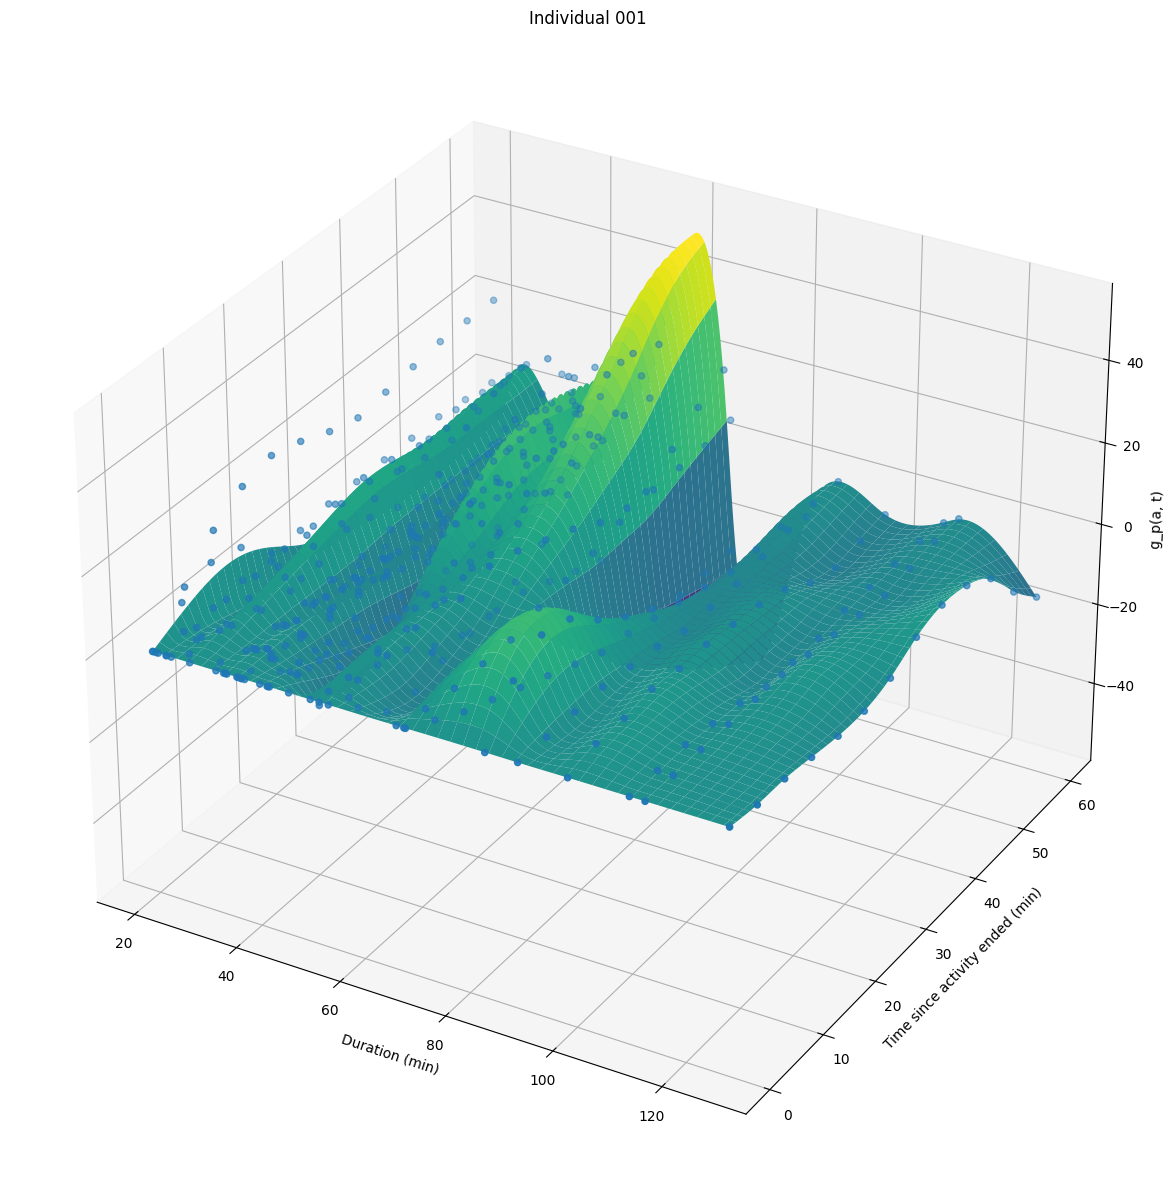

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


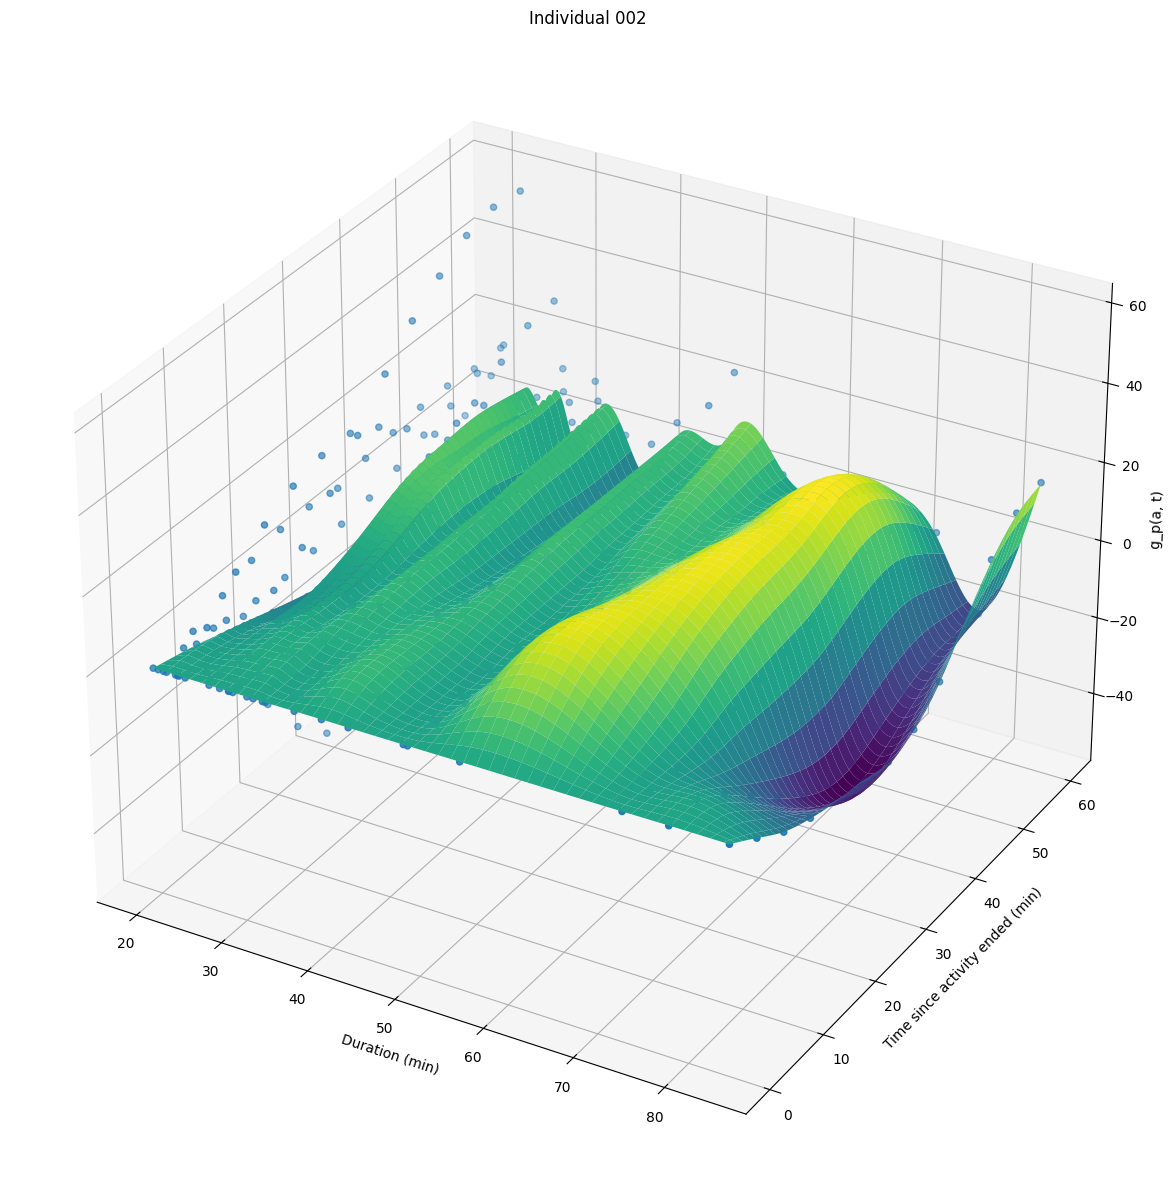

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


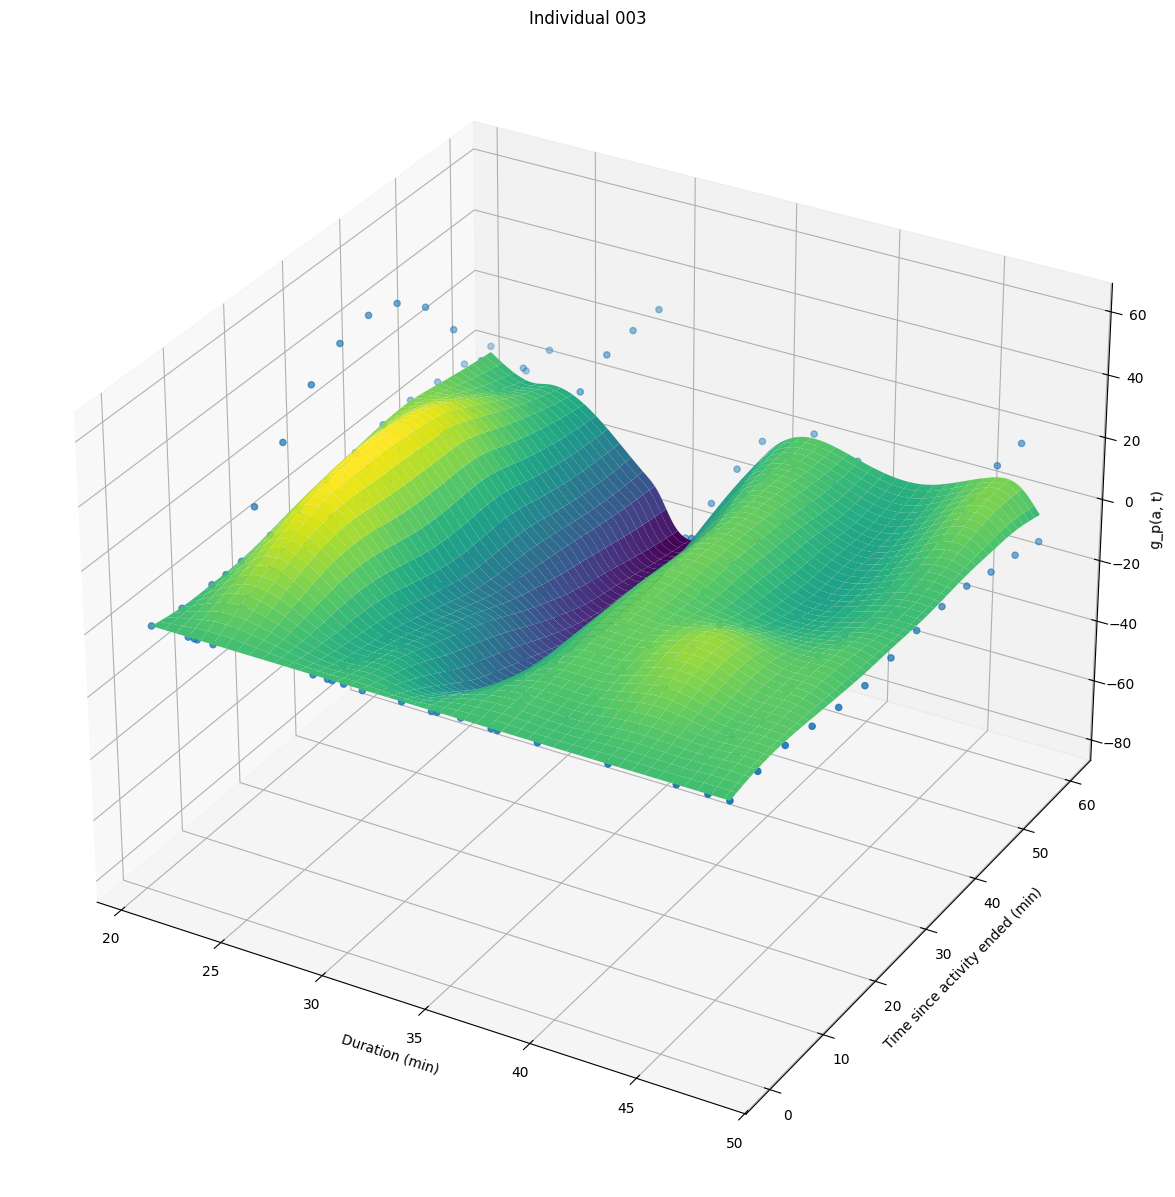

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


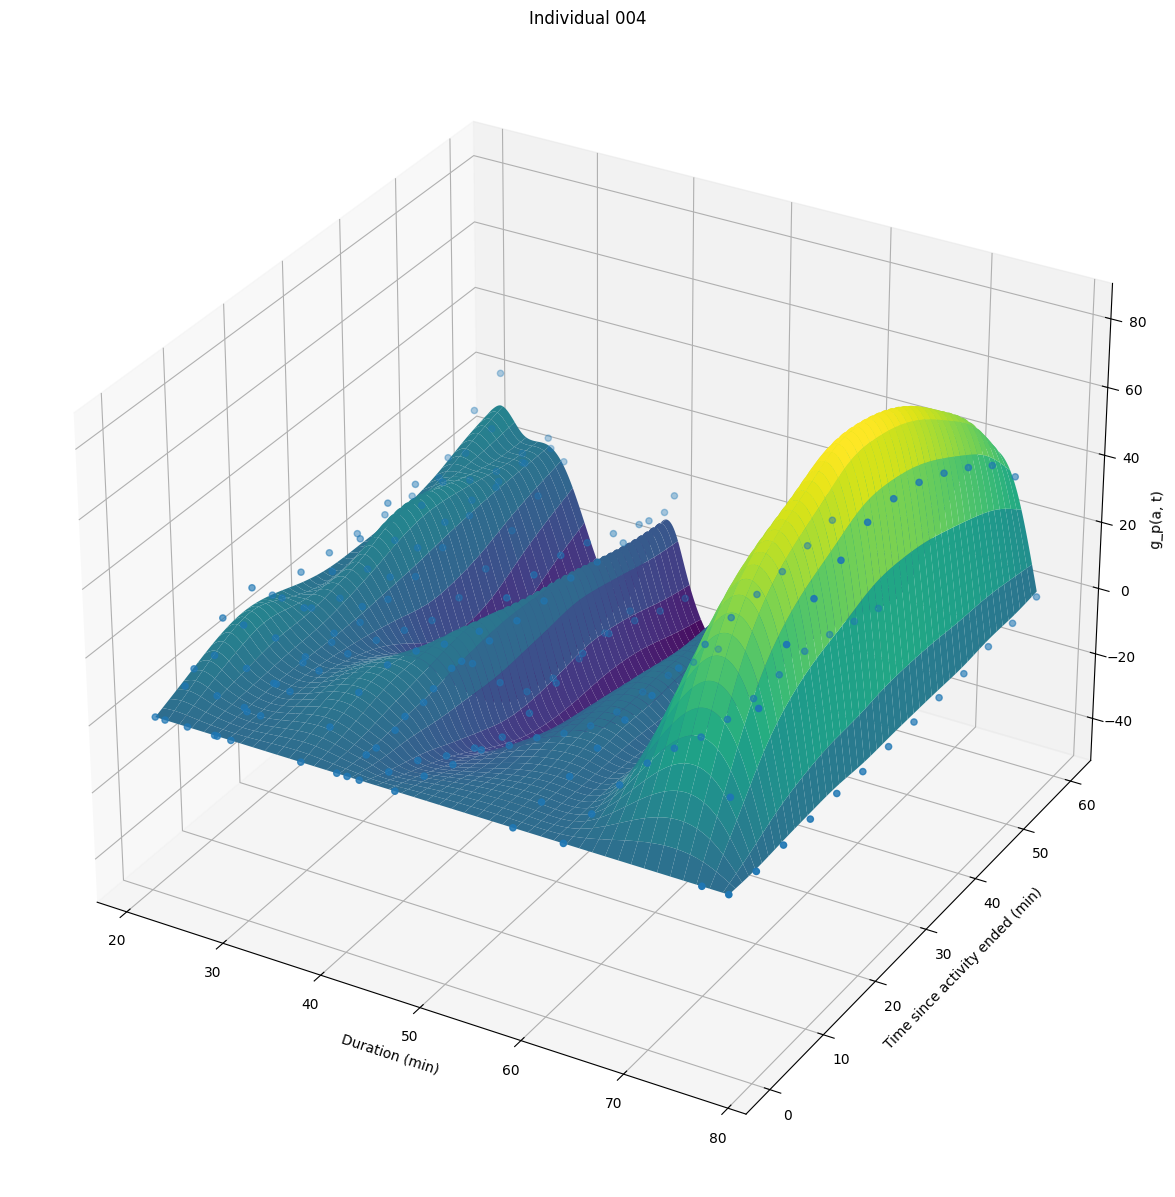

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


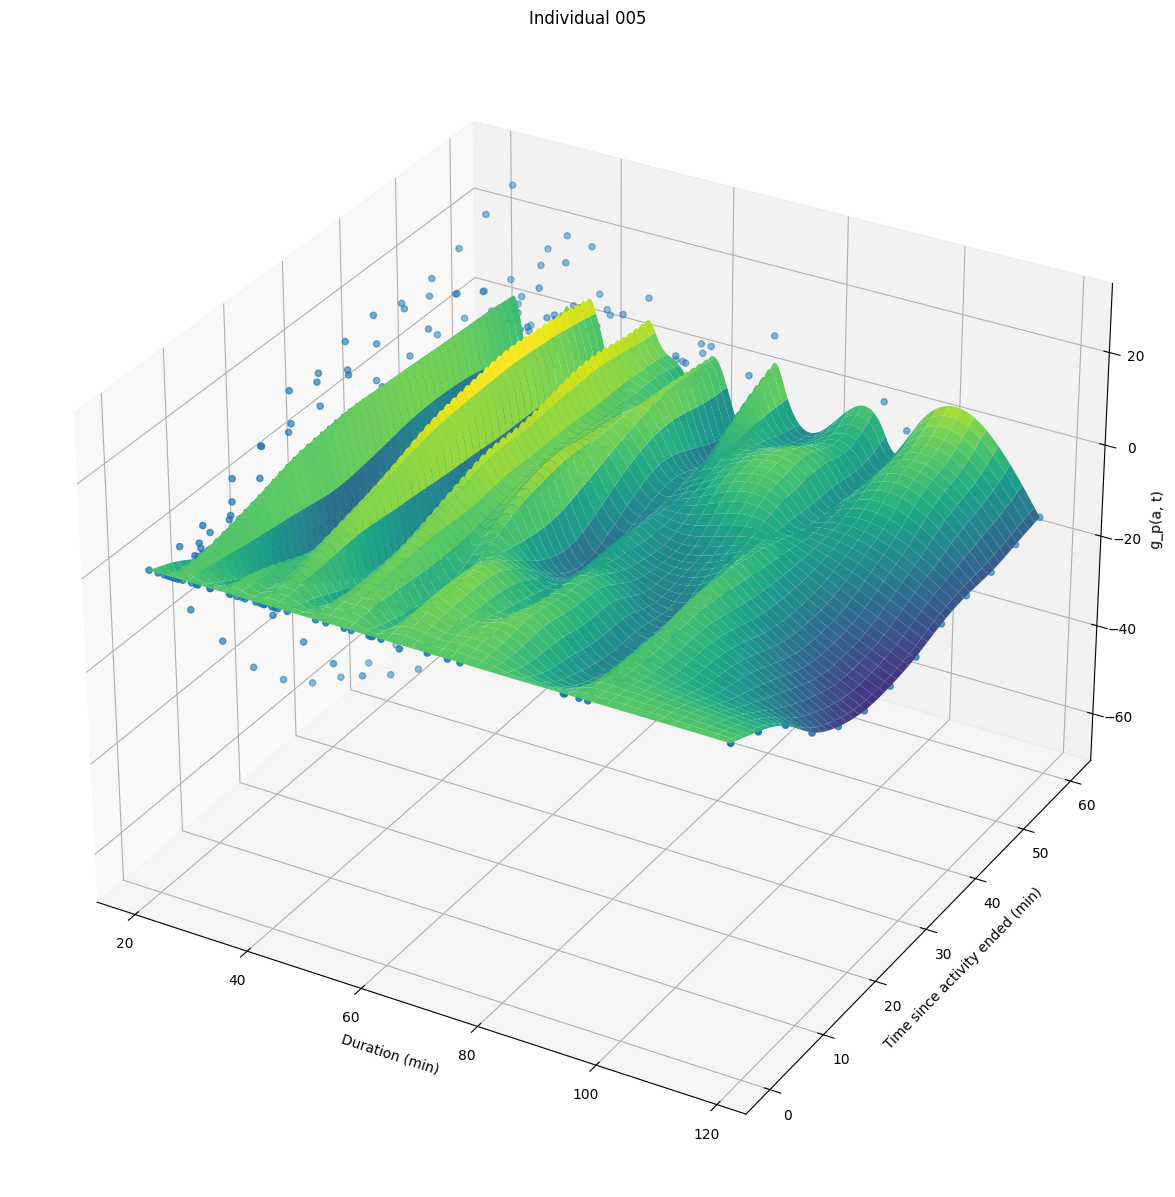

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


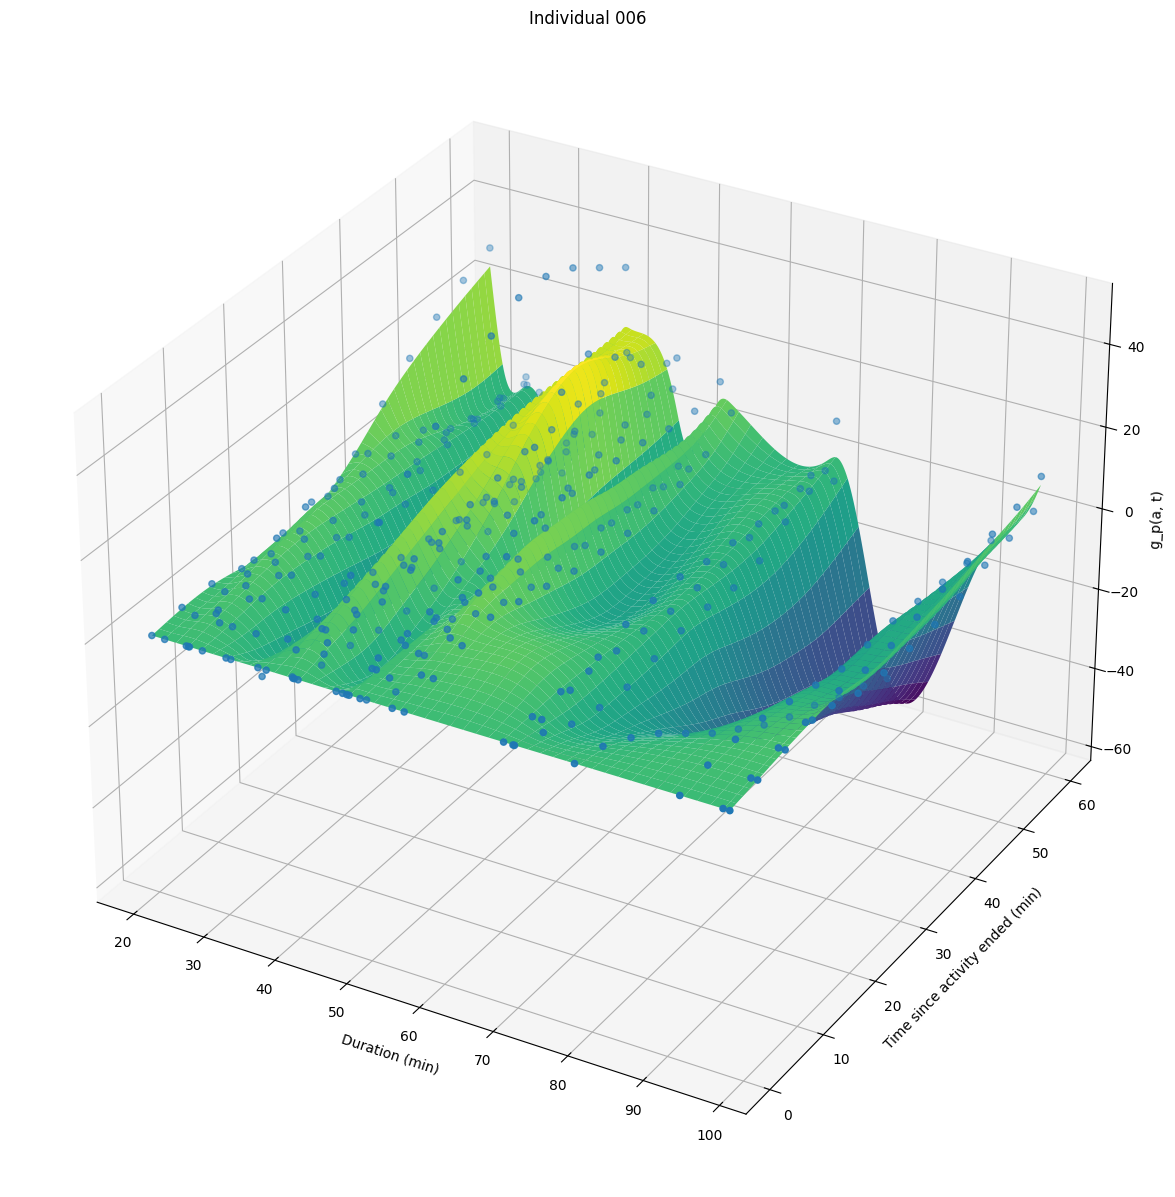

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


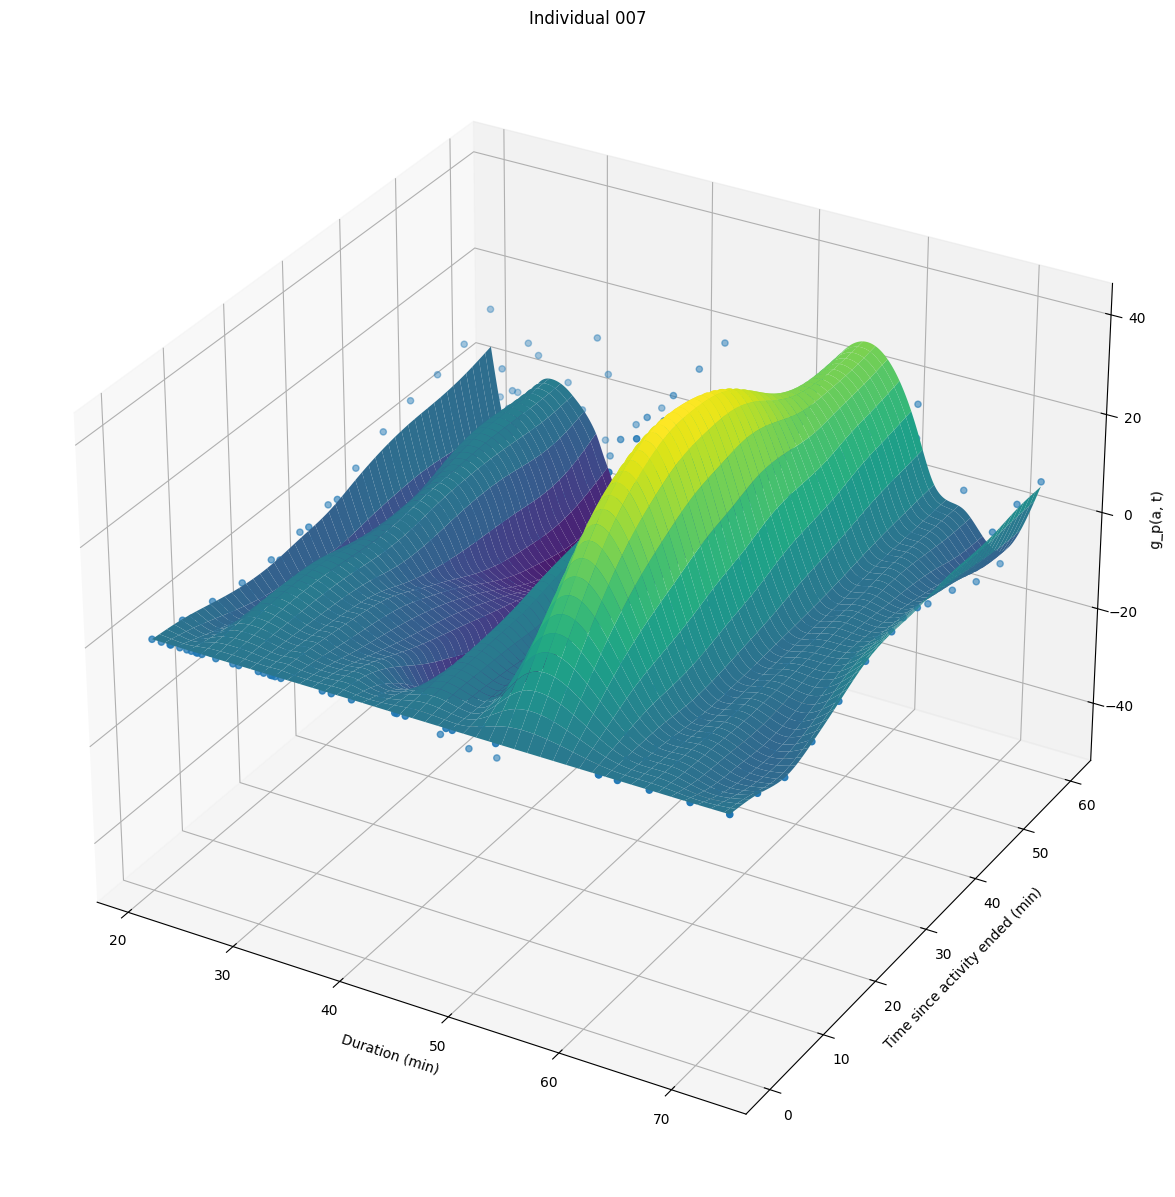

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


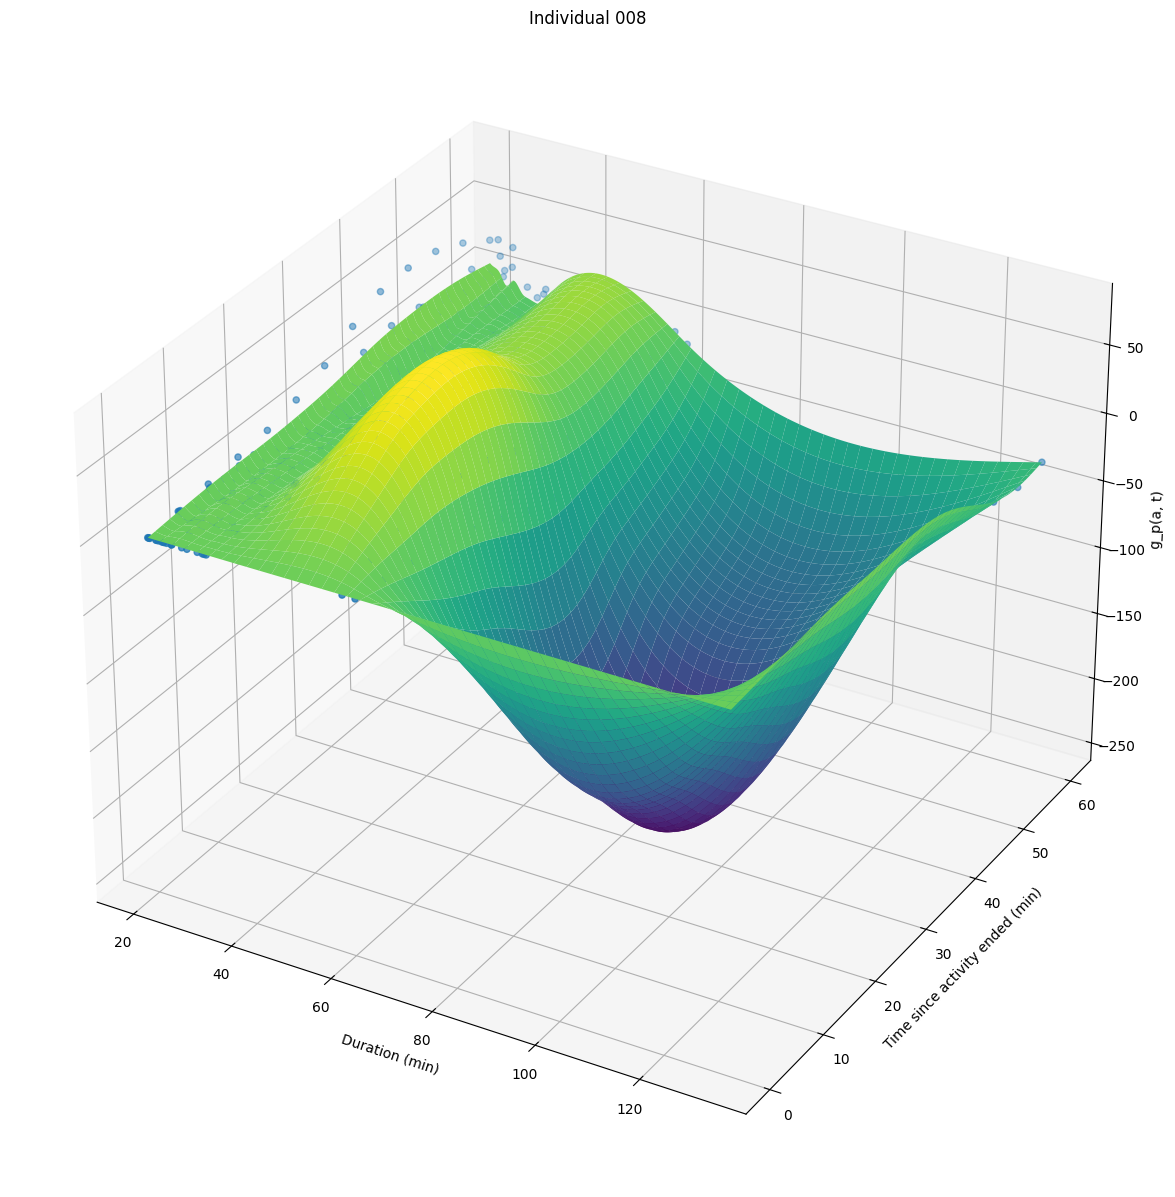

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


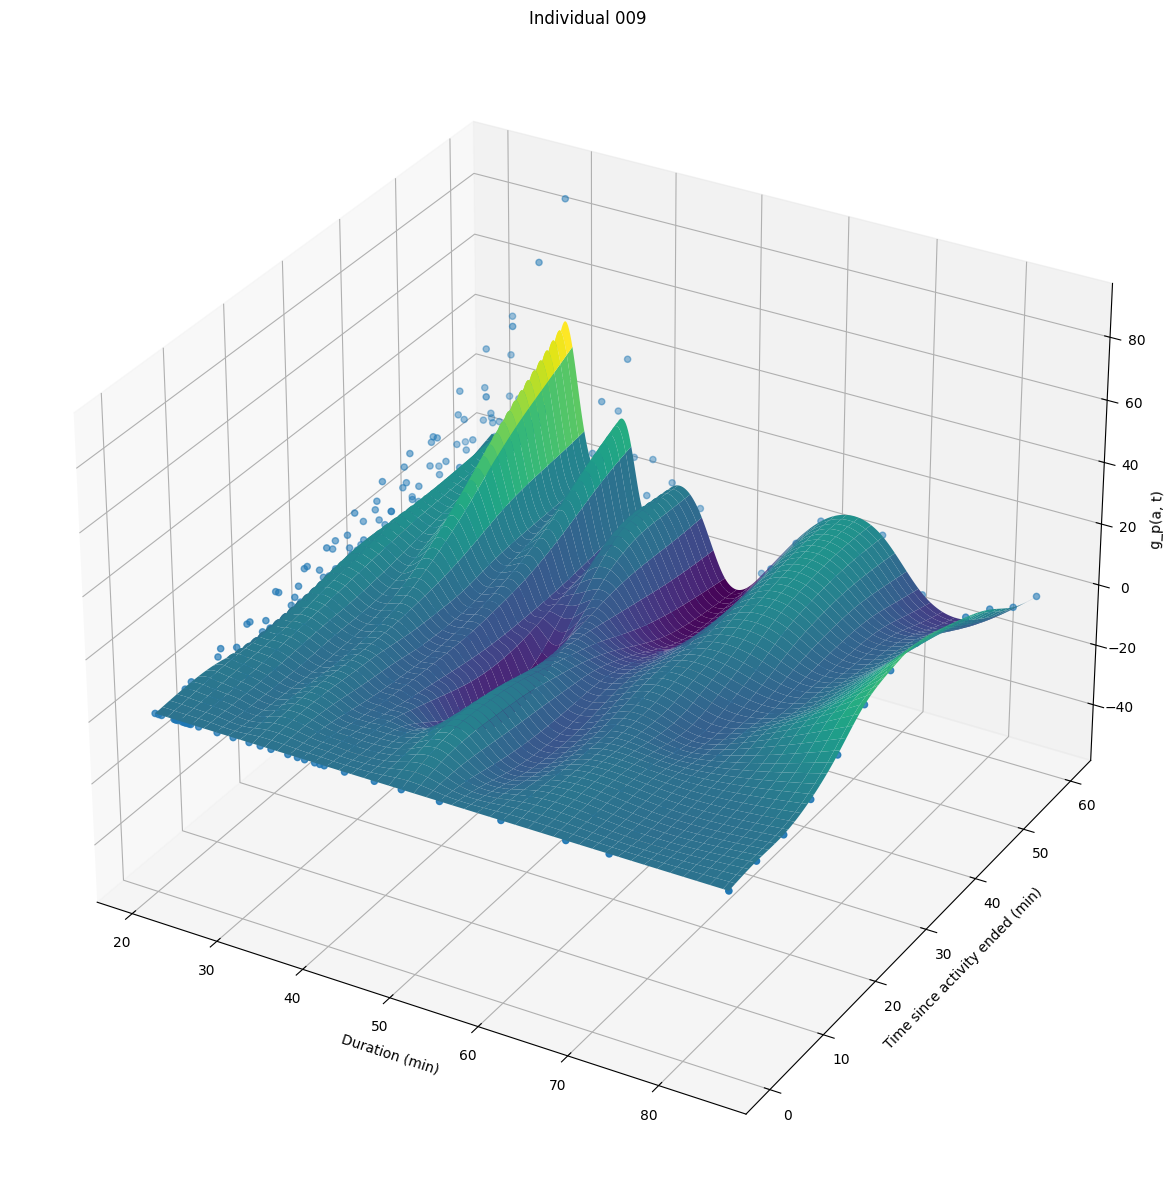

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


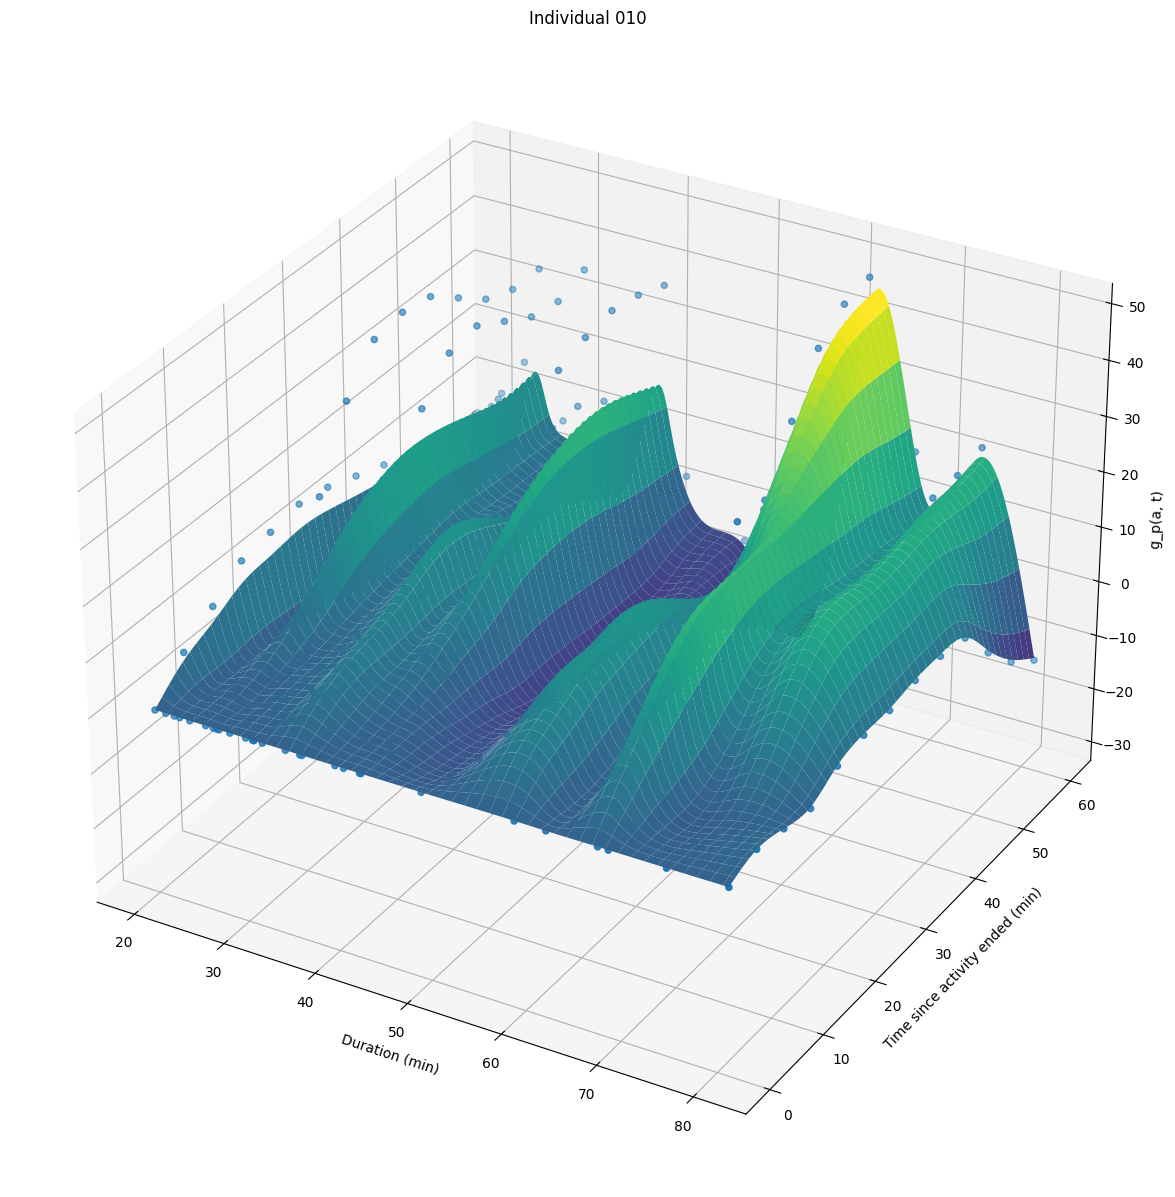

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


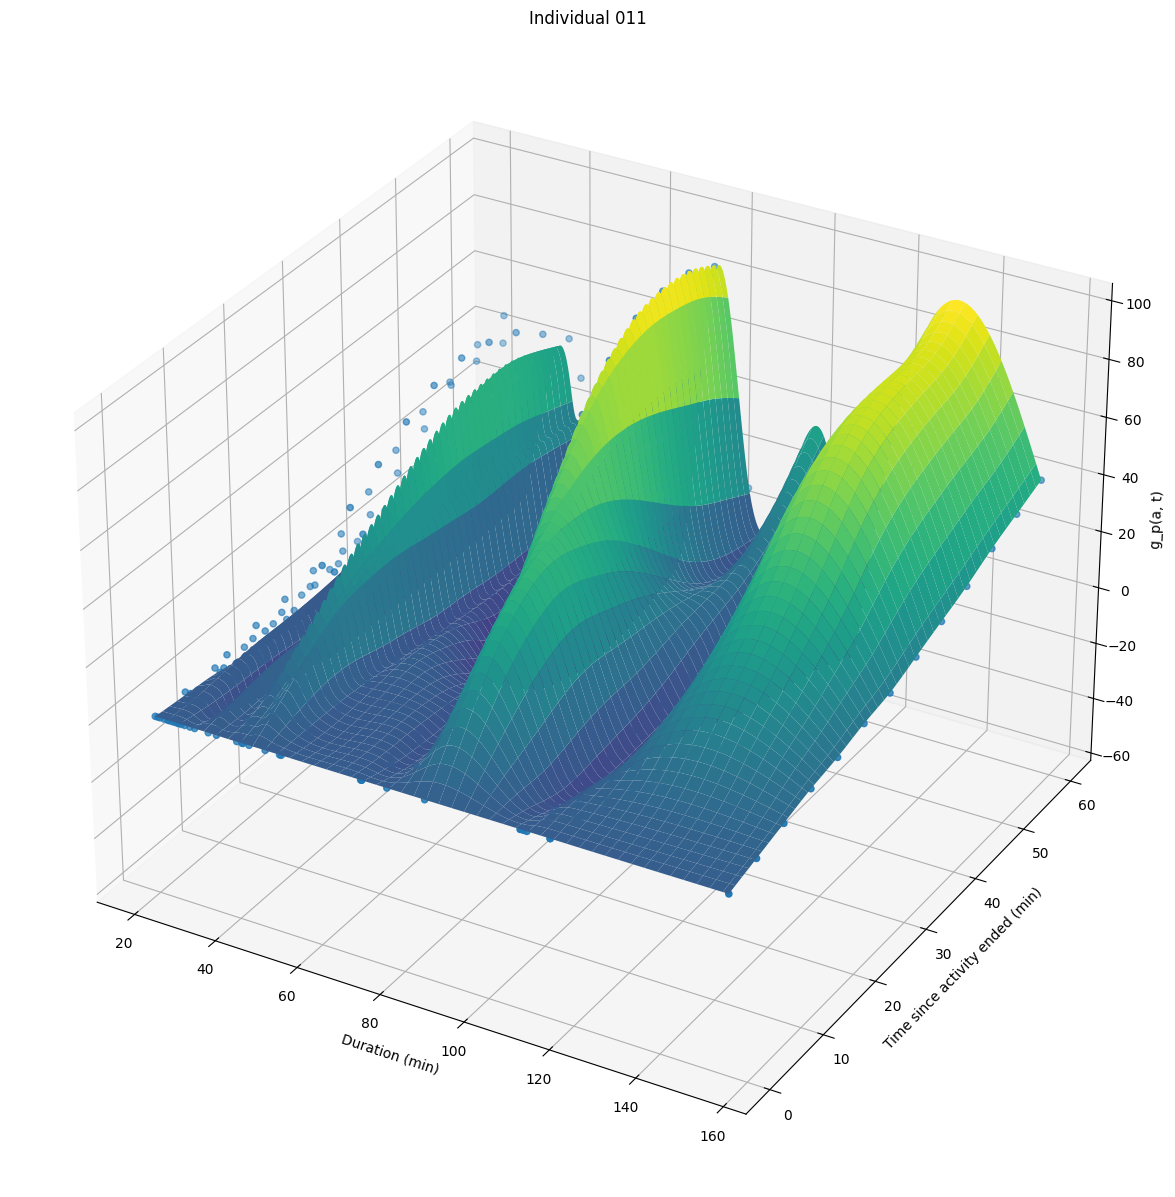

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


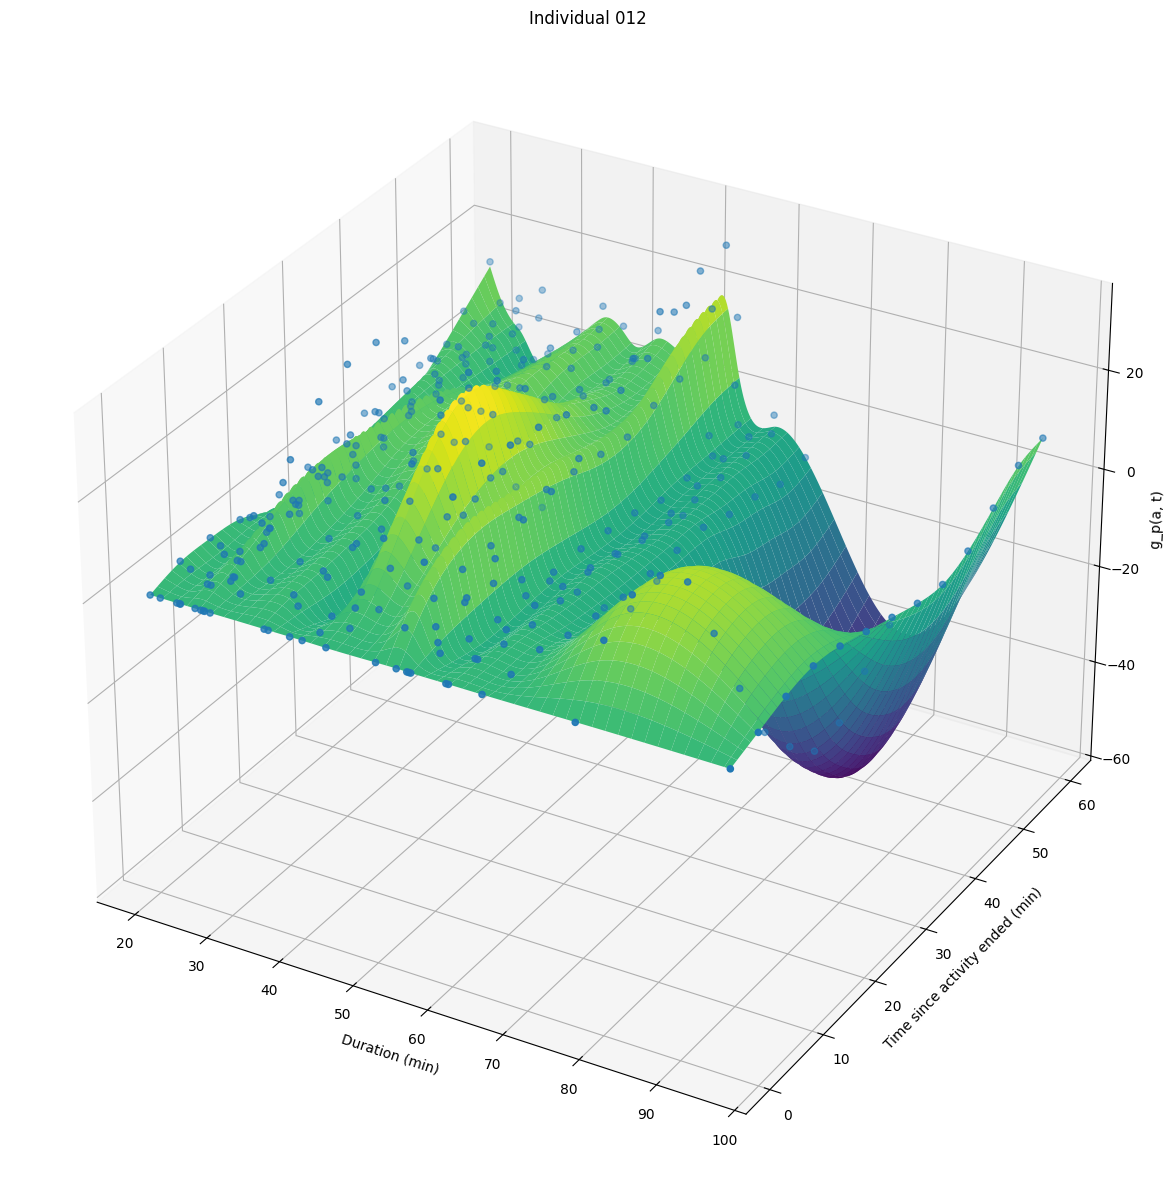

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


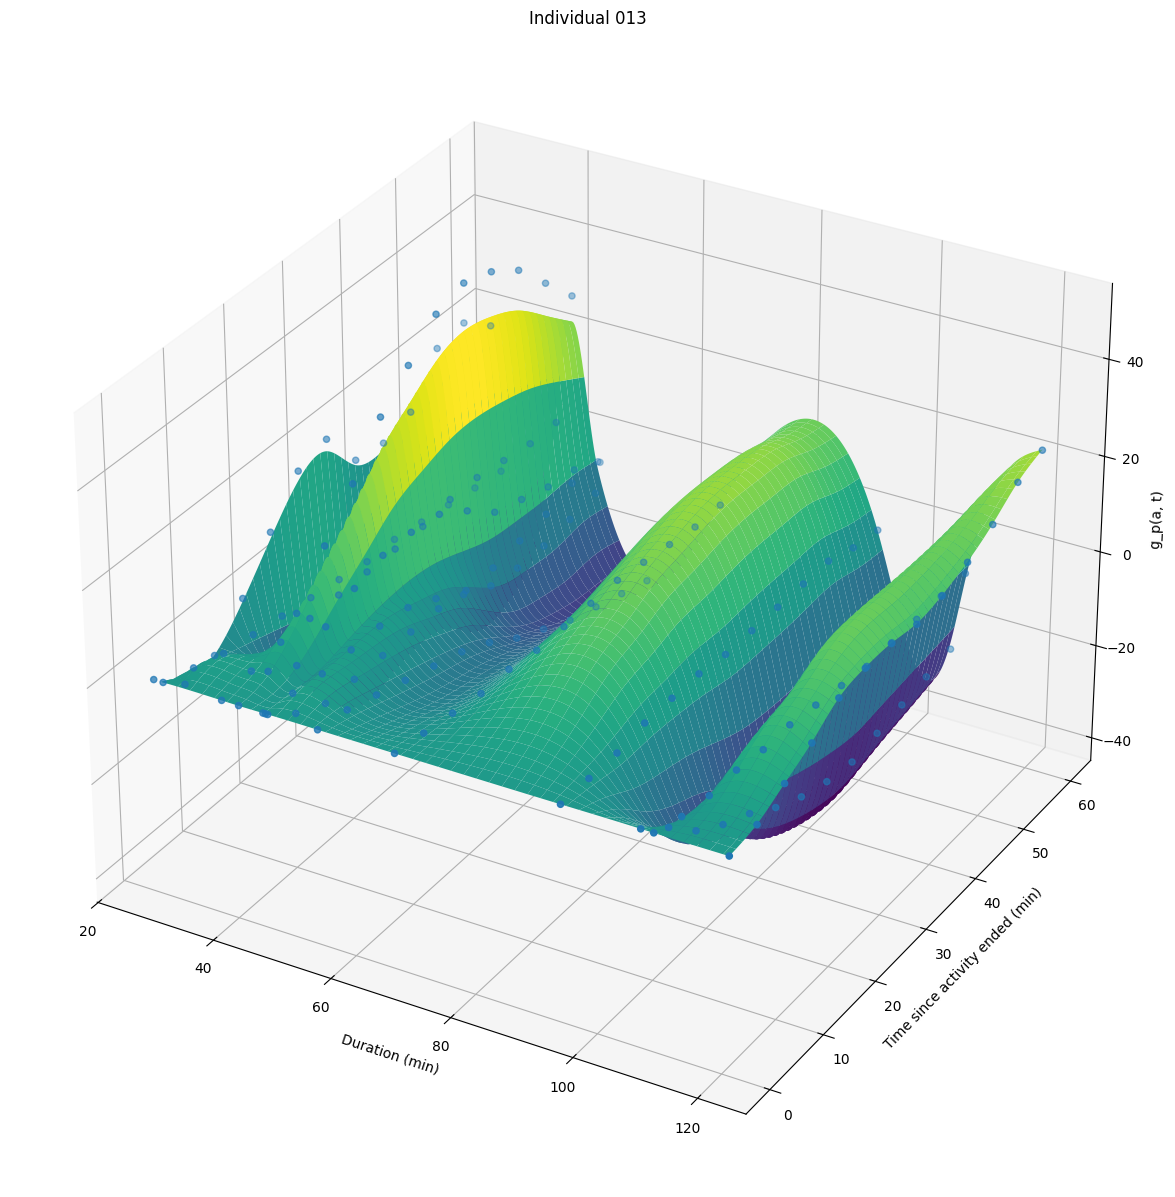

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


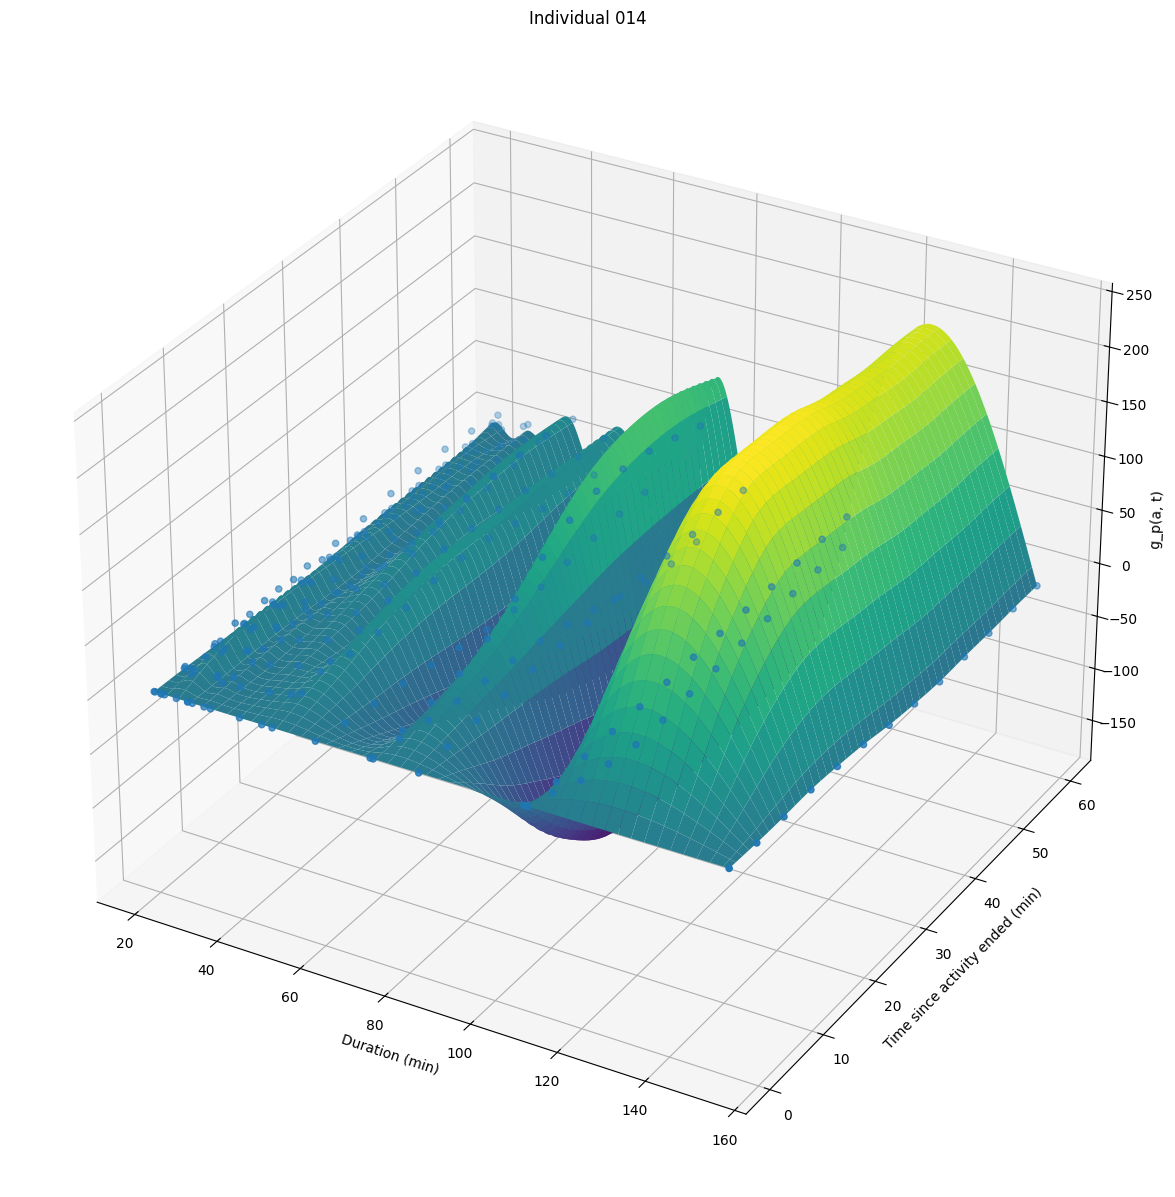

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


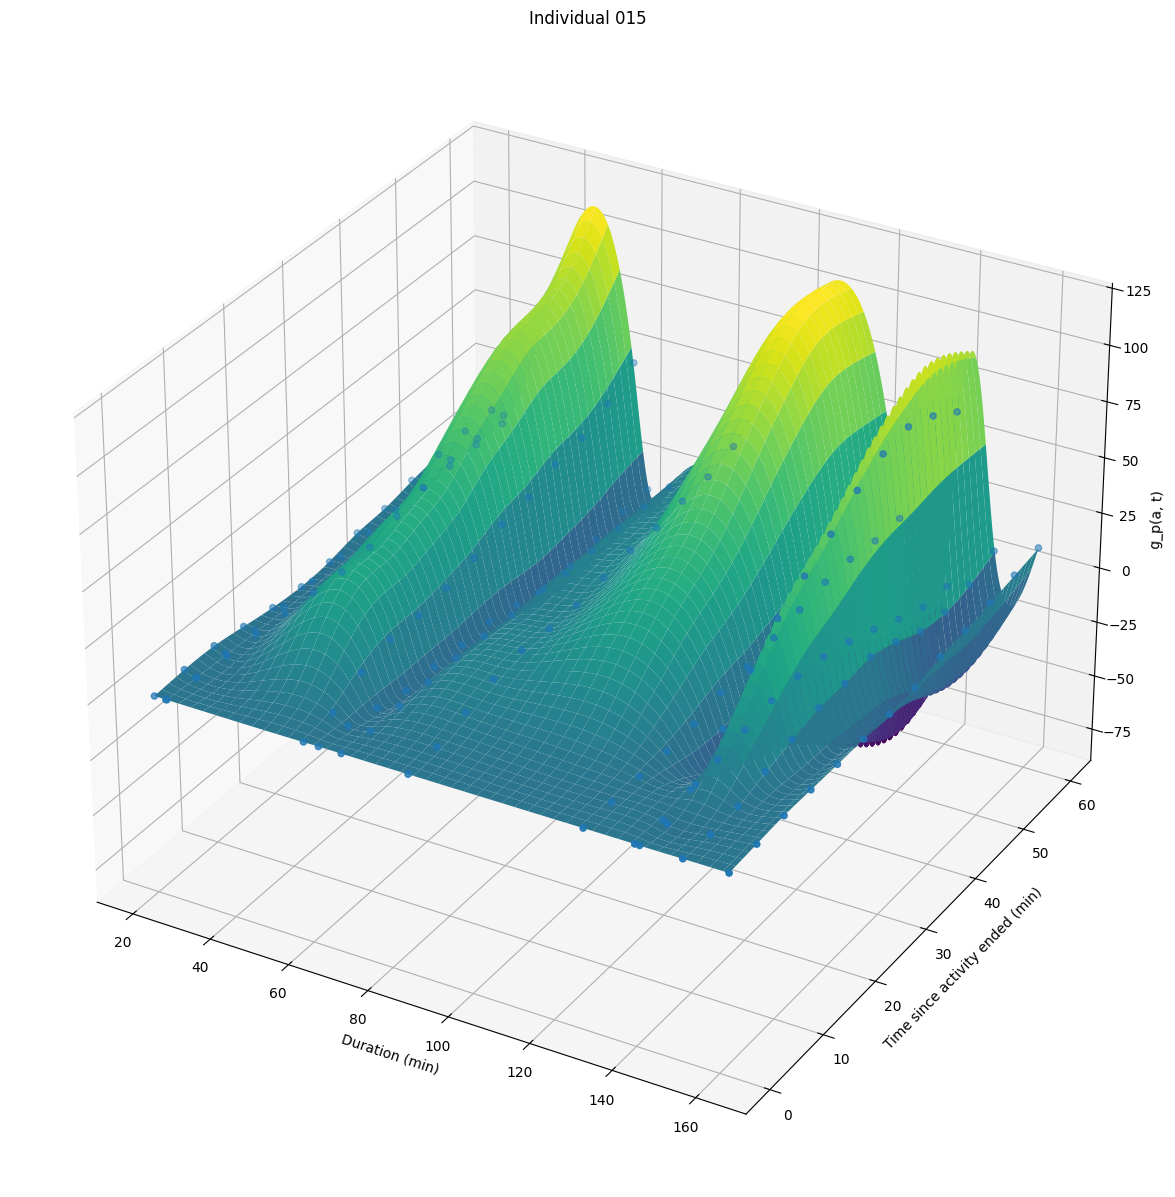

C:\Users\duyth\AppData\Local\Temp\ipykernel_12312\212216158.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


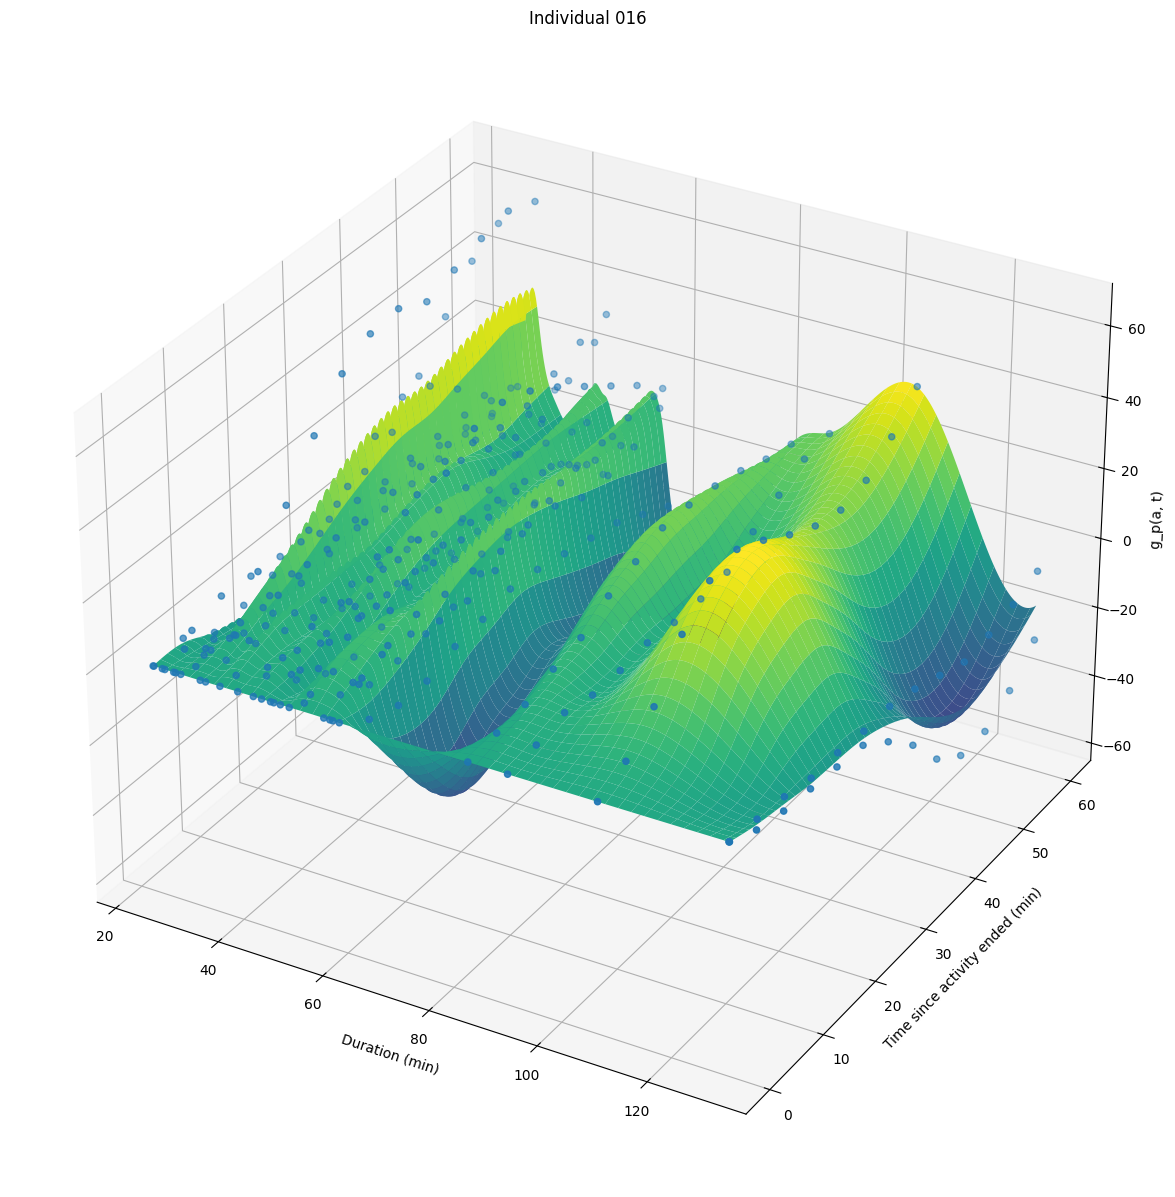

In [9]:
for i in range(1, 17):
  if i < 10:
    ind = f'00{i}'
  else:
    ind = f'0{i}'
  bivariate_GAM(ind, 0.5)